## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

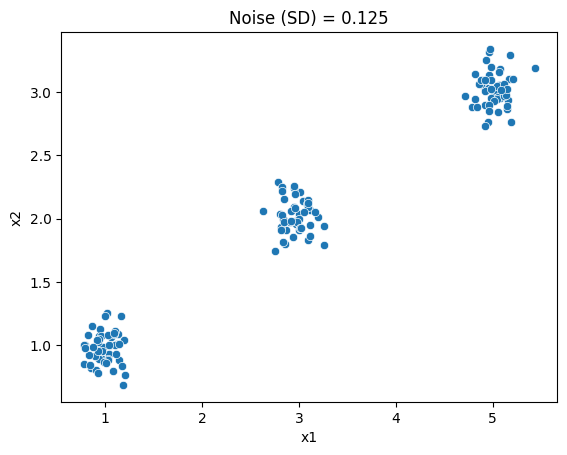

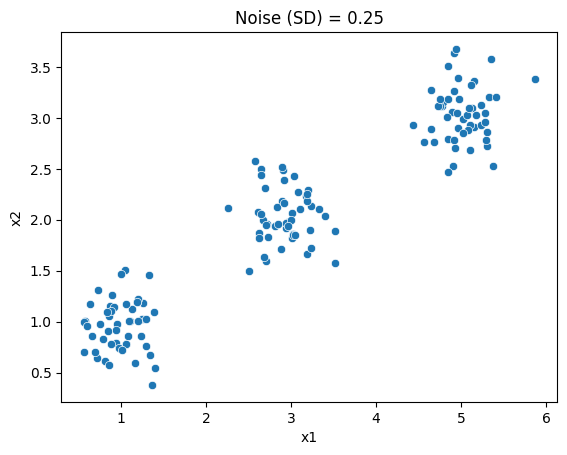

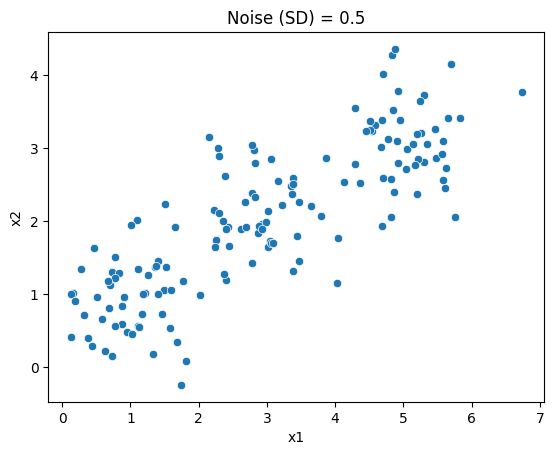

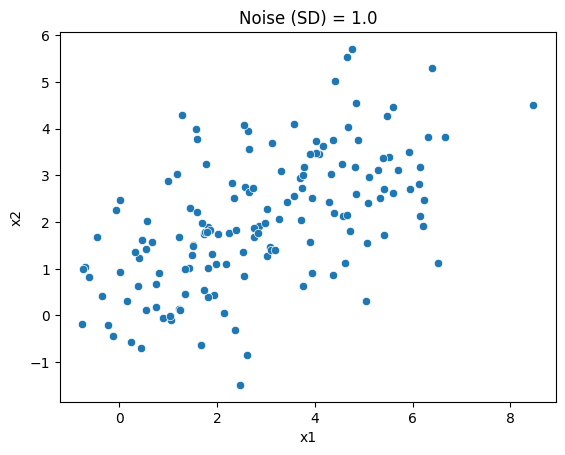

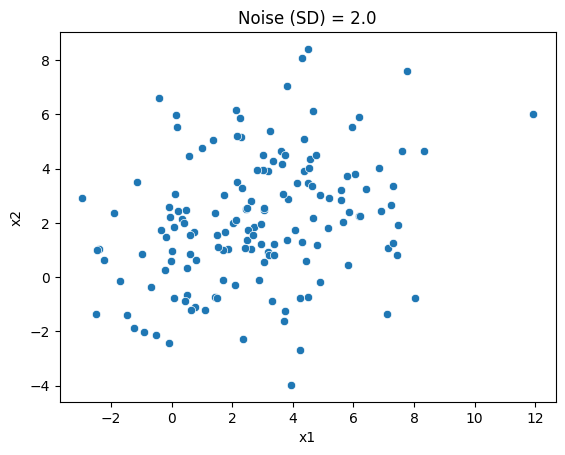

Low Noise (0.125, 0.25): The clusters are visually well-separated and distinct, it's easy to see three clear groups
Moderate Noise (0.5): The clusters are still somewhat discernible, but there's some overlap between them
High Noise (1.0, 2.0): The clusters become very difficult to distinguish. The points are scattered more randomly, and the boundaries between the groups are blurred. At the highest noise level (2.0), it's hard to visually idenfity any distinct clusters


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

# 2
scatter0125 = sns.scatterplot(x='x1',y='x2',data=df0_125).set_title('Noise (SD) = 0.125')
plt.show()
scatter025 = sns.scatterplot(x='x1',y='x2',data=df0_25).set_title('Noise (SD) = 0.25')
plt.show()
scatter05 = sns.scatterplot(x='x1',y='x2',data=df0_5).set_title('Noise (SD) = 0.5')
plt.show()
scatter1 = sns.scatterplot(x='x1',y='x2',data=df1_0).set_title('Noise (SD) = 1.0')
plt.show()
scatter2 = sns.scatterplot(x='x1',y='x2',data=df2_0).set_title('Noise (SD) = 2.0')
plt.show()

print("Low Noise (0.125, 0.25): The clusters are visually well-separated and distinct, it's easy to see three clear groups")
print("Moderate Noise (0.5): The clusters are still somewhat discernible, but there's some overlap between them")
print("High Noise (1.0, 2.0): The clusters become very difficult to distinguish. The points are scattered more randomly, and the boundaries between the groups are blurred. At the highest noise level (2.0), it's hard to visually idenfity any distinct clusters")

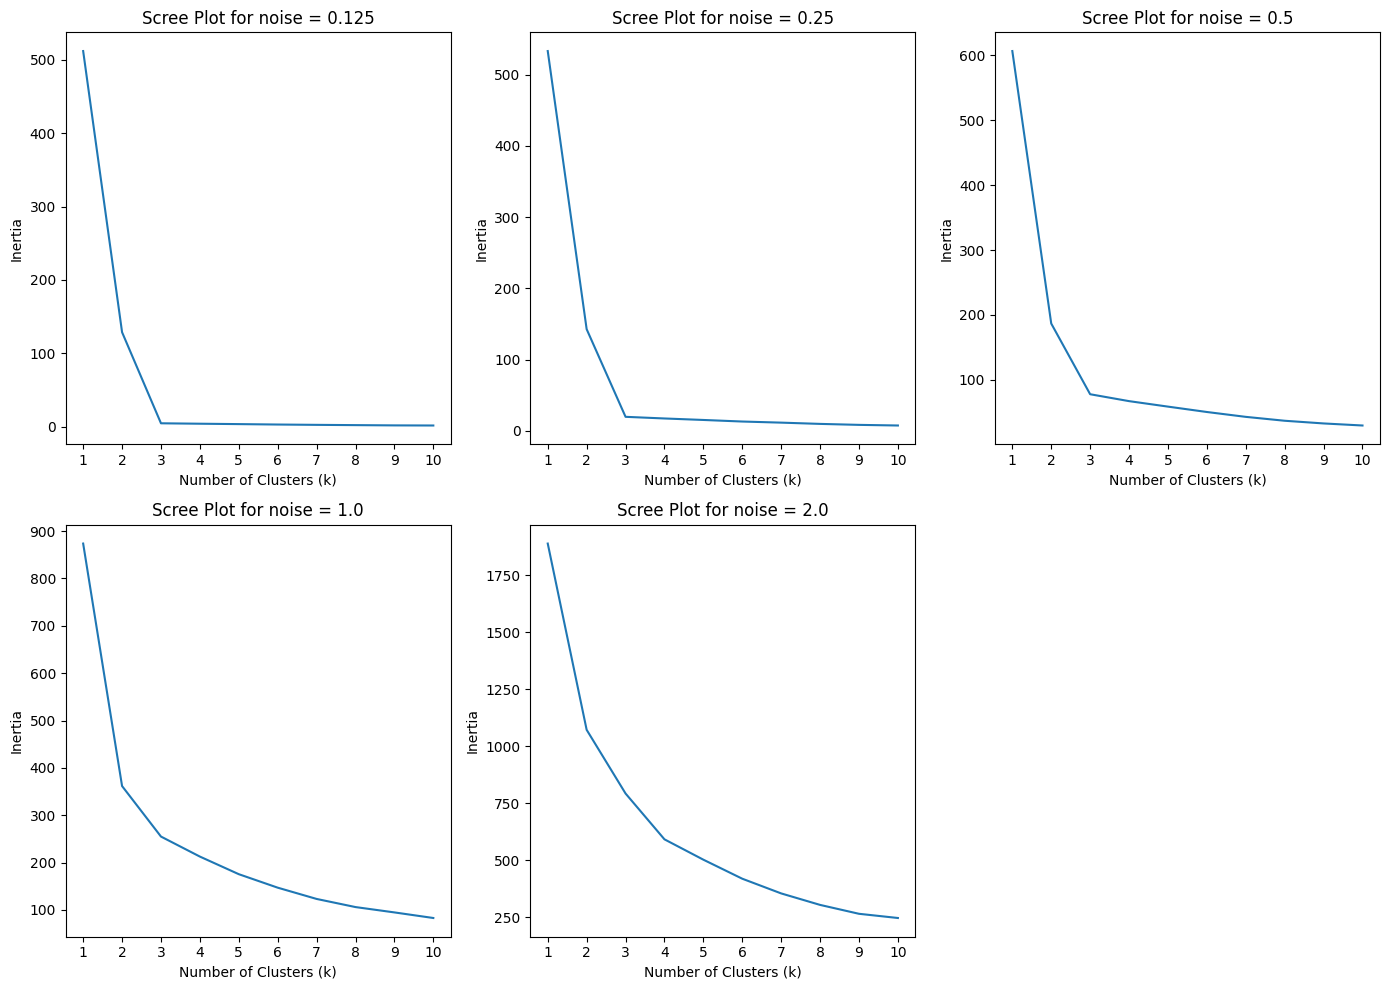

In [ ]:
# 3
from sklearn.cluster import KMeans

datasets = [df0_125, df0_25, df0_5, df1_0, df2_0]
noise_levels = [0.125, 0.25, 0.5, 1.0, 2.0]
max_clusters = 10

# create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

# flatten the axes arrary
axes = axes.flatten()

for i, (df, noise_level) in enumerate(zip(datasets, noise_levels)):
    inertia = []
    X = df[['x1', 'x2']].values

    # calculate inertia for different numbers of clusters
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, random_state=0)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    ax = axes[i]
    sns.lineplot(x=range(1, max_clusters + 1), y=inertia, ax=ax)
    ax.set_title(f'Scree Plot for noise = {noise_level}')
    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('Inertia')
    ax.set_xticks(range(1, max_clusters + 1))

# reassurance
if len(datasets) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

3.) The elbow on a scree plot marks the point at which the reduction in SSE (inertia) caused by adding more clusters slows dramatically. Adding extra clusters before the elbow helps to lower the SSE significantly. However, adding more clusters after the elbow only modestly lowers the SSE.


4.) The elbow in a scree plot represents the point where the reduction in SSE (inertia) from adding more clusters slows down significantly. Before the elbow, adding more clusters is beneficial as it drastically reduces the SSE. However, adding more clusters after the elbow only slightly reduces the SSE.

Initially, having a small number of clusters does not suit the model well since the cluster centers do not represent the data structure. when a result, when the number of clusters increases, the SSE falls dramatically since the points are better categorized. When you reach the elbow, adding more clusters will no longer significantly reduce the SSE since you've most likely found the optimal number of clusters that describe the underlying structure of the dataset. At this point, you have captured the majority of the data's significant structure without complicating the model.


**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

#1
# load the data
df = pd.read_csv('SIPRI Military Expenditure Database.csv')

# Filter the year
df_2020 = df[df['Year'] == 2020].copy()

# Drop rows with missing values
df_2020.dropna(inplace=True)

# Check the number of countries
print(f"Number of countries after filtering and dropping NaN values: {len(df_2020)}")

print(df_2020.head())
print(df_2020.describe())


Number of countries after filtering and dropping NaN values: 148
     index  Year      Country  Spending (2020 USD)  Percent of GDP  \
32      32  2020  Afghanistan           279.576955        0.013589   
66      66  2020      Albania           187.433234        0.012583   
100    100  2020      Algeria          9708.277440        0.066600   
134    134  2020       Angola           993.594405        0.014442   
168    168  2020    Argentina          2830.929705        0.007269   

     Percent of Government Spending  Spending per Capita  
32                         0.049728             7.181899  
66                         0.037952            65.126211  
100                        0.173924           221.392384  
134                        0.074624            30.231680  
168                        0.017268            62.636731  
             index    Year  Spending (2020 USD)  Percent of GDP  \
count   148.000000   148.0           148.000000      148.000000   
mean   2831.256757  2020.0

2.) Spending per capita has little bearing on how much a nation spends on militias. The US spends the most on its military overall and per capita, making it an extreme outlier in its own cluster. Since all of them spend roughly the same amount overall (besdies the US), cluster membership appears to be primarily based on per capita spending.


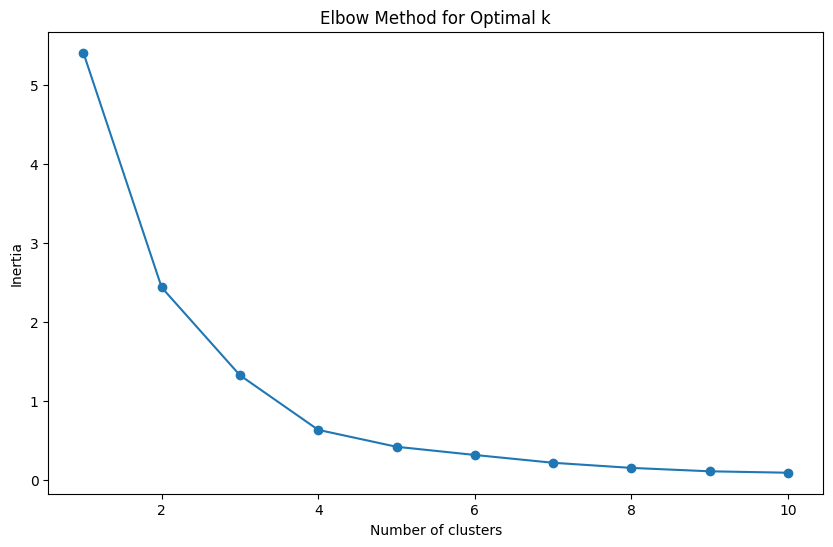

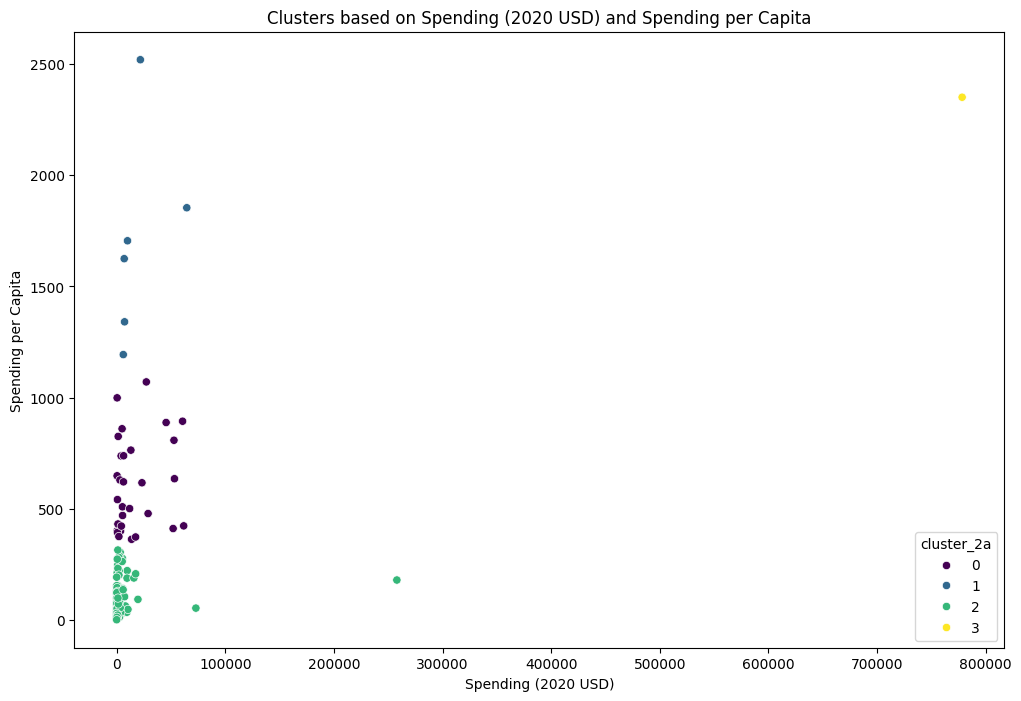

           Spending (2020 USD)                                              \
                         count           mean           std            min   
cluster_2a                                                                   
0                         30.0   17077.591354  20583.053357     405.790494   
1                          6.0   19443.362047  22861.507114    6095.708713   
2                        111.0    4859.185065  25405.739131       8.622460   
3                          1.0  778397.200000           NaN  778397.200000   

                                                                        \
                      25%            50%            75%            max   
cluster_2a                                                               
0             2294.039665    5857.060906   26296.001003   61712.537169   
1             7023.251766    8624.225729   18857.070183   64558.400000   
2              130.010211     382.464677    2297.032353  257973.429834   
3        

In [6]:
# 2
# Select features
features_2a = ['Spending (2020 USD)', 'Spending per Capita']
X_2a = df_2020[features_2a].copy()

scaler = MinMaxScaler()
X_2a[features_2a] = scaler.fit_transform(X_2a[features_2a])

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_2a[features_2a])
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means clustering
n_clusters_2a = 4 # Based on elbow plot
kmeans_2a = KMeans(n_clusters=n_clusters_2a,
                   n_init=10,
                   random_state=0)  # added n_init and random state
df_2020['cluster_2a'] = kmeans_2a.fit_predict(X_2a[features_2a])

# Scatter plot of Spending (2020 USD) vs Spending per Capita
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Spending (2020 USD)',
                y='Spending per Capita',
                hue='cluster_2a',
                data=df_2020,
                palette='viridis')
plt.title('Clusters based on Spending (2020 USD) and Spending per Capita')
plt.show()

# Group by cluster and describe
cluster_description_2a = df_2020.groupby('cluster_2a')[features_2a].describe()
print(cluster_description_2a)

# Identify the US
us_data = df_2020[df_2020['Country'] == 'United States']
print("\nUnited States Data:")
print(us_data[['Country', 'Spending (2020 USD)', 'Spending per Capita', 'cluster_2a']])

3.) The graph shows a positive association, meaning that nations with higher government spending percentages also typically have higher GDP percentages. Although the clusters aren't as clear as in part 2, this provides a more nuanced picture of the nation's military priorities.


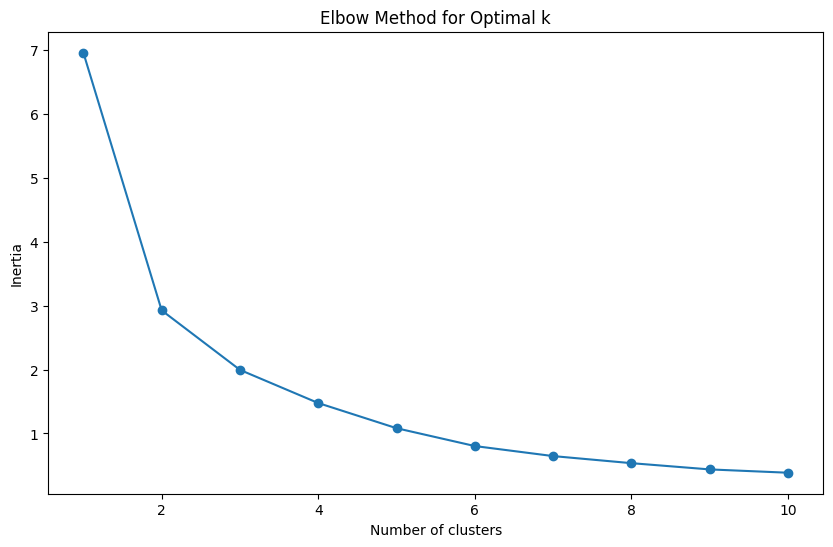

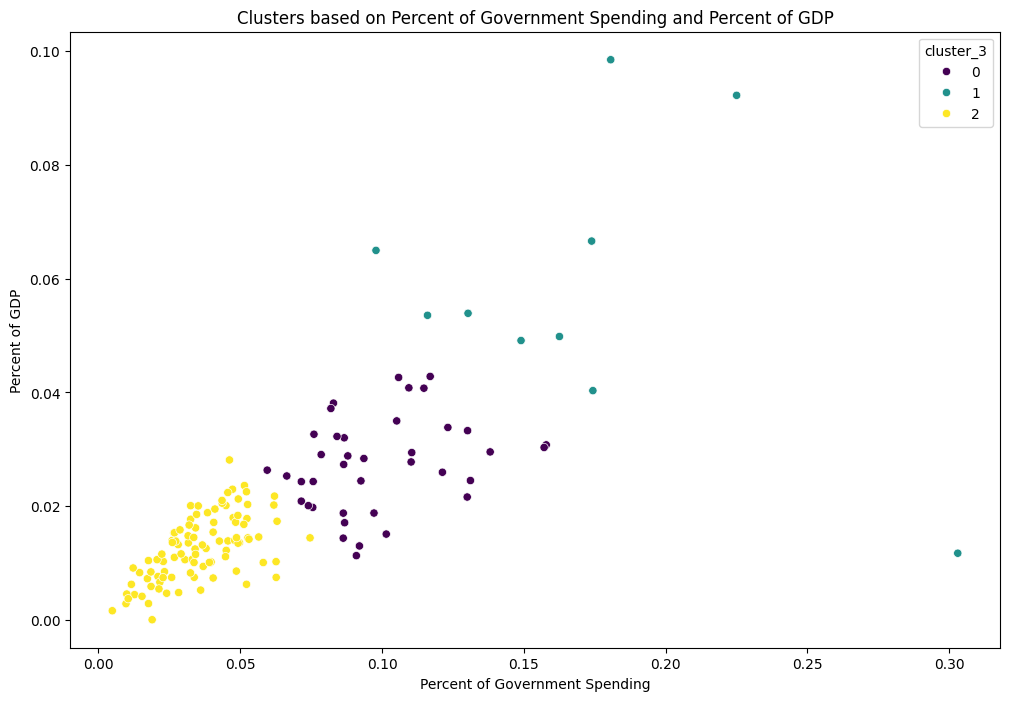

          Percent of Government Spending                                \
                                   count      mean       std       min   
cluster_3                                                                
0                                   39.0  0.098683  0.024125  0.059520   
1                                   10.0  0.171289  0.058725  0.097882   
2                                   99.0  0.035777  0.014549  0.004896   

                                                  Percent of GDP            \
                25%       50%       75%       max          count      mean   
cluster_3                                                                    
0          0.082430  0.092044  0.112633  0.157918           39.0  0.027412   
1          0.135010  0.168248  0.179081  0.303027           10.0  0.058071   
2          0.025921  0.034261  0.047402  0.074624           99.0  0.012664   

                                                                       
              

In [7]:
# 3
features_3 = ['Percent of Government Spending', 'Percent of GDP']
X_3 = df_2020[features_3].copy()

X_3[features_3] = scaler.fit_transform(X_3[features_3])

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_3[features_3])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

n_clusters_3 = 3

kmeans_3 = KMeans(n_clusters=n_clusters_3,
                  n_init=10,
                  random_state=0)
df_2020['cluster_3'] = kmeans_3.fit_predict(X_3[features_3])

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Percent of Government Spending',
                y='Percent of GDP',
                hue='cluster_3',
                data=df_2020,
                palette='viridis')
plt.title('Clusters based on Percent of Government Spending and Percent of GDP')
plt.show()

cluster_description_3 = df_2020.groupby('cluster_3')[features_3].describe()
print(cluster_description_3)

us_data = df_2020[df_2020['Country'] == 'United States']
print("\nUnited States Data:")
print(us_data[['Country', 'Percent of Government Spending', 'Percent of GDP', 'cluster_3']])

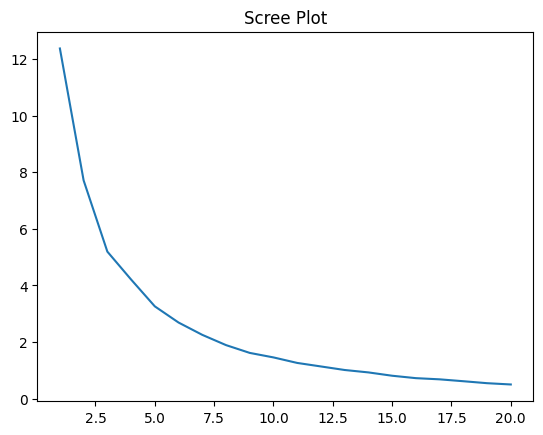

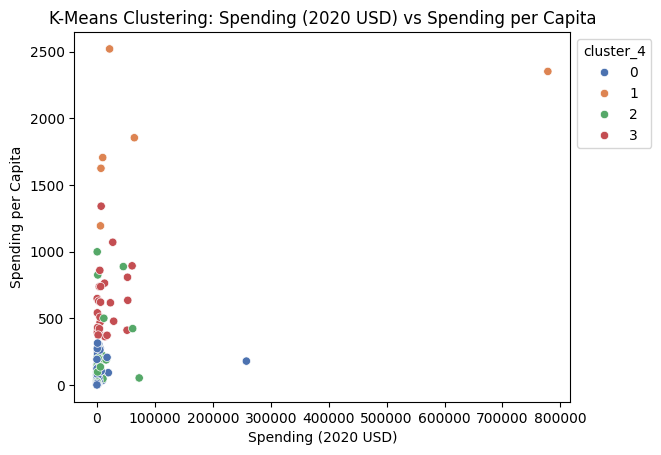

          Spending (2020 USD)                                             \
                        count           mean            std          min   
cluster_4                                                                  
0                        86.0    4513.543790   27841.230783     8.622460   
1                         6.0  147964.582042  309635.189564  6095.708713   
2                        30.0    9073.543709   18135.032885   163.926877   
3                        26.0   15330.618681   18923.469359   405.790494   

                                                                   \
                   25%           50%           75%            max   
cluster_4                                                           
0            81.022976    288.061512   1138.618231  257973.429834   
1          7700.424616  15897.570598  53872.942442  778397.200000   
2           522.737081   1663.090134   8646.648849   72937.064048   
3          3176.345598   5857.060906  21818.934764   

In [10]:
# 4
features_4 = [
    'Spending (2020 USD)', 'Spending per Capita', 'Percent of Government Spending',
    'Percent of GDP'
]
X_4 = df_2020[features_4].copy()

# Remove NaN/inf
X_4.replace([np.inf, -np.inf], np.nan, inplace=True)
X_4.dropna(inplace=True)
df_2020_cleaned = df_2020.loc[X_4.index]

# Normalize
scaler = MinMaxScaler()
X_4[features_4] = scaler.fit_transform(X_4[features_4])

# Scree plot
SSE = []
k_bar = 20
for k in range(k_bar):
      model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
      model = model.fit(X_4)
      SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')
plt.show()

# K-Means clustering
n_clusters_4 = 4  # Elbow

kmeans_4 = KMeans(n_clusters=n_clusters_4,
                  n_init=10,
                  random_state=0)
df_2020_cleaned['cluster_4'] = kmeans_4.fit_predict(X_4)

plot4 = sns.scatterplot(x='Spending (2020 USD)', y='Spending per Capita', data=df_2020_cleaned, hue='cluster_4', palette='deep')
sns.move_legend(plot4, "upper left", bbox_to_anchor=(1, 1))
plt.title('K-Means Clustering: Spending (2020 USD) vs Spending per Capita')
plt.show()

# Describe clusters
cluster_description_4 = df_2020_cleaned.groupby('cluster_4')[features_4].describe()
print(cluster_description_4)

# Show US data
us_data = df_2020_cleaned[df_2020_cleaned['Country'] == 'United States']
print("\nUnited States Data:")
print(us_data[[
    'Country', 'Spending (2020 USD)', 'Spending per Capita',
    'Percent of Government Spending', 'Percent of GDP', 'cluster_4'
]])


5.)

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?